# Frequency-Squared Excitations of SDOF Systems

## Exercise 4

Consider a simply supported beam in a high-speed train structure. When the train travels at increasing speeds, the beam is subjected to an oscillatory load $F(t)$ with frequency-dependent magnitude.

The load is modeled as: 
$$
F(t) = F_0 \omega^2 \sin(\omega t)
$$

where:

$$
F_0 = 10 \ \text{N}
$$

---

### Tasks
- Derive the equation of motion of the system.
- Solve the equation of motion for the following parameters: $m$ = 2 kg, $k$ = 20 N/m, $c$ = 0.5 Ns/m, $\omega$ = 5 rad/s.
- Plot the time response $x(t)$.


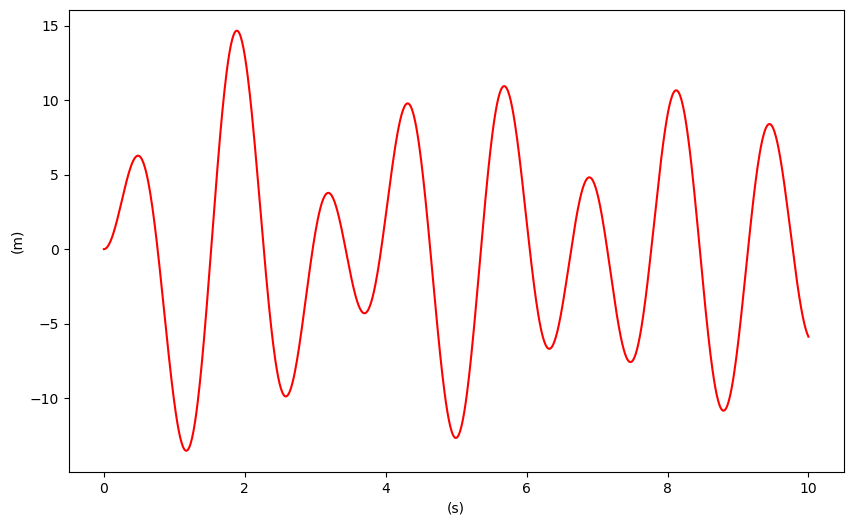

In [7]:
# A high-speed train structure
#

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Given constants
## your code for F0, omega, m, c, k


# Define the system of first-order ODEs
# y[0] = displacement (y), y[1] = velocity (dy/dt)
def model(y, t):
    x, v = y
    ## your code for dydt and dvdt
    
    
    return [dydt, dvdt]

y_init = [0, 0]  # Initial displacement and velocity
t = np.linspace(0, 10, 1000)  # From 0 to 10 seconds

# Numerical solution
y_num = odeint(model, y_init, t)
y_displacement = y_num[:, 0]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(t,y_displacement,'r',linewidth=1.5)
plt.xlabel('(s)')
plt.ylabel('(m)')
plt.show()

## Exercise 5
An engine mount system is designed to isolate a vibrating engine from the vehicle body. The engine produces a frequency-squared excitation force due to the inherent increase in vibration amplitude with engine speed:

$$F(t) = F_0 \omega^2 \cos(\omega t)$$

where
$$
F_0 = 10
$$

---

### Task 

- Simulate a range from low to high values of $r$ = [0.5, 1.0, 2.0] to represent the full operating range of the engine.
- Analyze how the displacement amplitude behaves at different engine speeds.

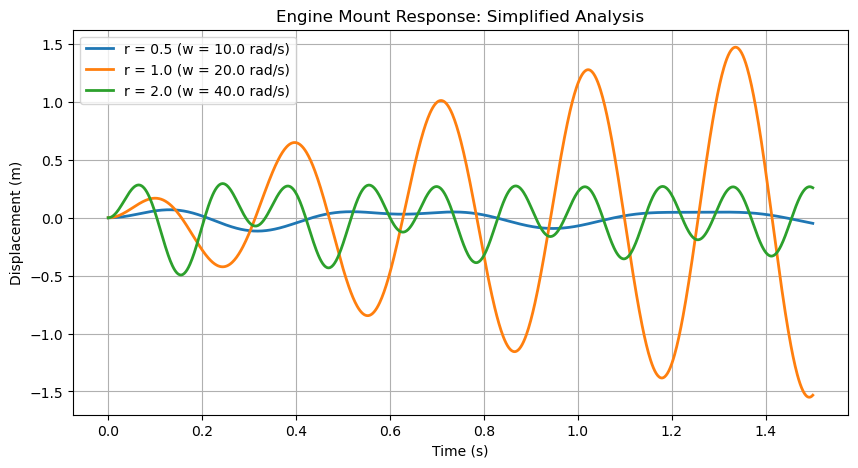

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

m, k, c, f0 = 50, 20000, 100, 10
t = np.linspace(0, 1.5, 1000)

# Test 3 scenarios: Below resonance, At resonance, Above resonance
## your code for omega_n & r_values




def model(y, t, omega):
    x, v = y
    ## your code for dxdt & dvdt
    
    
    return [dxdt, dvdt]

plt.figure(figsize=(10, 5))

for r in r_values:
    omega = r * omega_n
    y_num = odeint(model, [0, 0], t, args=(omega,))
    plt.plot(t, y_num[:, 0], label=f'r = {r} (w = {omega:.1f} rad/s)', linewidth=2)

plt.title("Engine Mount Response")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.legend()
plt.grid(True)
plt.show()

## Exercise 6

The objective of this exercise is to evaluate the effectiveness of an engine mount by calculating the Transmissibility Ratio (TR). This ratio measures how much of the engine's vibration force is transmitted to the vehicle's chassis.

Using the physical parameters from the previous engine model (Exercise 5), we analyze the force transmission as the engine speed increases. The Transmissibility Ratio is defined as the ratio of the transmitted force ($F_T$) to the excitation force ($F_0$):
$$
TR = \frac{F_T}{F_0} = \sqrt{\frac{1 + (2\zeta r)^2}{(1 - r^2)^2 + (2\zeta)^2}}
$$

Vary the frequency ratio $r$ from $0 \le r \le 3$. Plot the TR curve against $r$.

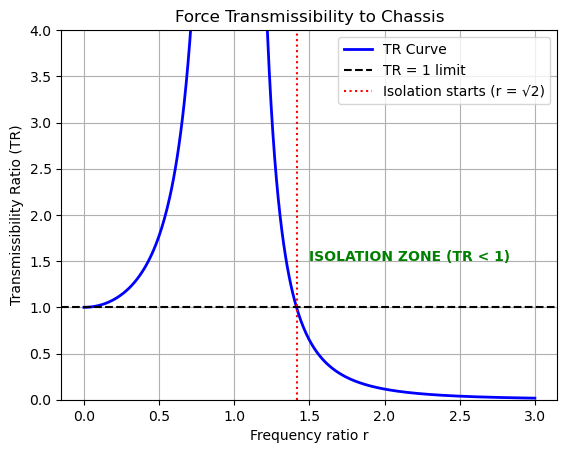

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# System parameters
## your code for m, k, c, F0, omega_n, zeta



# Range of frequency ratios
r = np.linspace(0, 3, 500)

# Calculate Transmissibility Ratio (TR)
## your code for numerator and denominator 


TR = numerator / denominator

# Plotting the TR curve
plt.plot(r, TR, 'b', label='TR Curve', linewidth=2)

# Critical lines and zones
plt.axhline(1, color='k', linestyle='--', label='TR = 1 limit') # Threshold
plt.axvline(np.sqrt(2), color='r', linestyle=':', label='Isolation starts (r = √2)') # Crossover

plt.text(1.5, 1.5, 'ISOLATION ZONE (TR < 1)', fontweight='bold', color='green')
plt.ylim(0, 4)
plt.xlabel('Frequency ratio r')
plt.ylabel('Transmissibility Ratio (TR)')
plt.title('Force Transmissibility to Chassis')
plt.legend()
plt.grid(True)
plt.show()

## 7. Tasks for Independent Work

In the previous exercises, we assumed a constant damping coefficient ($c = 100 \text{ Ns/m}$). However, in real-world engineering, there is a trade-off between controlling the resonance peak and achieving high-frequency isolation. High damping reduces the vibration at resonance but increases force transmission at high speeds. 

Analyze the dual-role of damping and find the "optimal" damping ratio that balances safety (resonance control) and comfort (high-speed isolation).

---
### Tasks

- Plot the Transmissibility Ratio (TR) for four different damping ratios: $\zeta = 0.05, 0.1, 0.2,$ and $0.5$.
- Observe how the TR curves intersect at $r = \sqrt{2}$.

- Calculate the TR value at a high engine speed ($r = 3$) for both $\zeta = 0.05$ and $\zeta = 0.5$.
- Quantify (in percent) how much more force is transmitted to the chassis when using the higher damping ratio at this speed.

### Summary of Results and Conclusions

Summary of Results and Conclusions

**The Crossover Point ($r = \sqrt{2}$)**: All TR curves intersect at $r = \sqrt{2}$ where $TR = 1$. Below this point, higher damping is beneficial as it reduces the resonance peak. Above this point, higher damping is detrimental.

**High-Speed Trade-off**: At $r = 3$, the calculation shows that the system with $\zeta = 0.5$ transmits significantly more force to the chassis than the system with $\zeta = 0.05$.

**Engineering Insight**: To maximise passenger comfort at high speeds, damping should be kept as low as possible, provided that the system can safely pass through the resonance frequency during startup and shutdown.